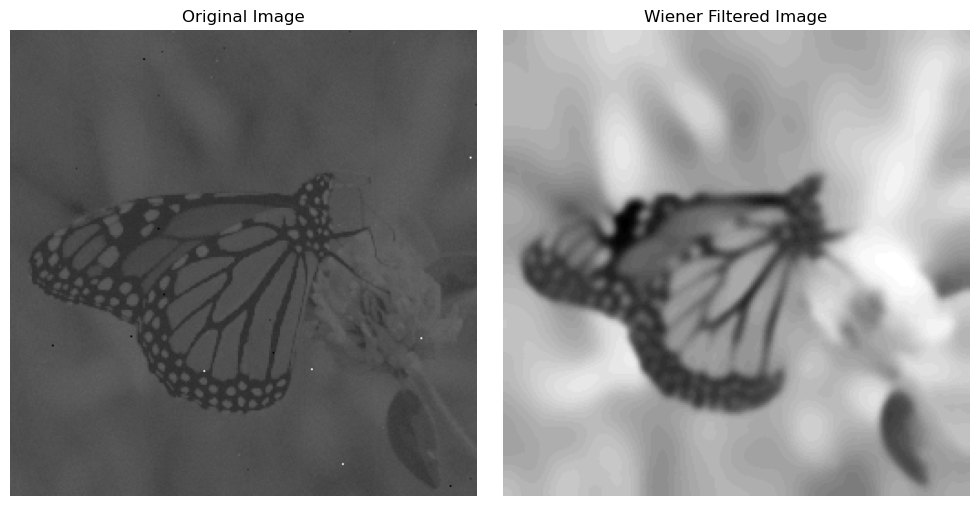

In [1]:
import cv2
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt

# Function for Wiener Filter
def wiener_filter(img, kernel_size=5, noise_var=0.1):
    # Generate a kernel (this example uses a simple average kernel)
    kernel = np.ones((kernel_size, kernel_size)) / (kernel_size * kernel_size)
    
    # Apply convolution (linear filtering)
    img_blurred = convolve2d(img, kernel, mode='same', boundary='wrap')
    
    # Estimate the noise-to-signal ratio and apply Wiener filter
    filtered = cv2.fastNlMeansDenoising(np.uint8(img_blurred), None, 10, 7, 21)
    return filtered

# Load an image (grayscale for simplicity)
img_path = 'C:/Users/DS20/Desktop/image.png'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Apply Wiener Filter
wiener_result = wiener_filter(img, kernel_size=5, noise_var=0.1)

# Plot the original and Wiener filtered images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wiener_result, cmap='gray')
plt.title("Wiener Filtered Image")
plt.axis('off')

plt.tight_layout()
plt.show()


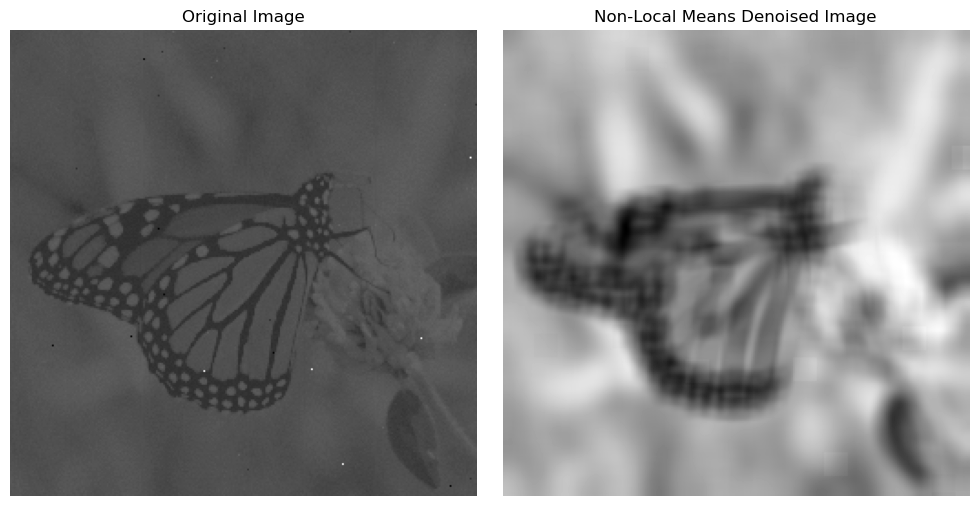

In [3]:
import cv2
import numpy as np
from skimage.restoration import denoise_nl_means, estimate_sigma
import matplotlib.pyplot as plt

# Function for Non-Local Means (NLM) Denoising
def nlm_denoising(img):
    # Estimate the noise standard deviation (sigma) without using 'multichannel' argument
    sigma_est = np.mean(estimate_sigma(img))
    
    # Apply Non-Local Means denoising
    denoised_img = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=True, patch_size=5, patch_distance=6)
    return denoised_img

# Load an image (grayscale for simplicity)
img_path = 'C:/Users/DS20/Desktop/image.png'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Check if the image loaded correctly
if img is None:
    raise ValueError(f"Image at path {img_path} could not be loaded. Please check the path.")

# Apply Non-Local Means Denoising
nlm_result = nlm_denoising(img)

# Plot the original and NLM denoised images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(nlm_result, cmap='gray')
plt.title("Non-Local Means Denoised Image")
plt.axis('off')

plt.tight_layout()
plt.show()


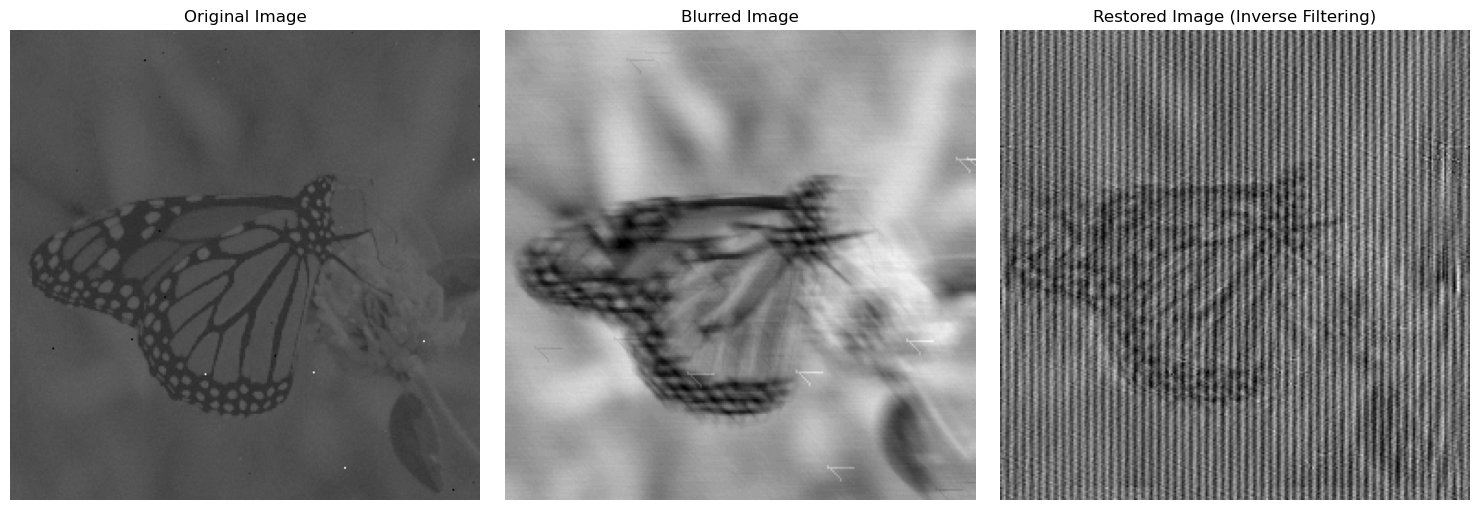

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function for Inverse Filtering
def inverse_filtering(img, kernel, noise_var=0.1):
    # Fourier Transform of the image and the kernel
    img_freq = np.fft.fft2(img)
    kernel_freq = np.fft.fft2(kernel, s=img.shape)
    
    # Inverse filtering in the frequency domain (simple division)
    kernel_freq = np.fft.fftshift(kernel_freq)  # Shift to center of frequency
    img_freq = np.fft.fftshift(img_freq)  # Shift to center of frequency
    
    # Avoid division by zero by setting a small value for small frequencies
    epsilon = 1e-6
    restored_freq = img_freq / (kernel_freq + epsilon)
    
    # Inverse Fourier Transform to get the restored image
    restored_img = np.fft.ifft2(np.fft.ifftshift(restored_freq))
    
    # Take the real part (imaginary part should be near zero due to perfect inverse)
    restored_img = np.abs(restored_img)
    
    return np.uint8(restored_img)

# Generate a simple blur kernel (for example, a motion blur kernel)
def motion_blur_kernel(size, angle):
    """Generates a motion blur kernel of specified size and angle."""
    kernel = np.zeros((size, size))
    center = size // 2
    for i in range(size):
        for j in range(size):
            if i == center:
                kernel[i, j] = 1
            elif j == center + int(i * np.tan(angle)):
                kernel[i, j] = 1
    kernel = kernel / np.sum(kernel)  # Normalize kernel
    return kernel

# Load the image
img_path = 'C:/Users/DS20/Desktop/image.png'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Check if image is loaded correctly
if img is None:
    raise ValueError(f"Image at path {img_path} could not be loaded. Please check the path.")

# Simulate a motion blur by applying the motion blur kernel to the image
kernel_size = 15
angle = np.pi / 4  # 45 degrees motion blur
kernel = motion_blur_kernel(kernel_size, angle)
blurred_img = cv2.filter2D(img, -1, kernel)

# Apply Inverse Filtering
restored_img = inverse_filtering(blurred_img, kernel)

# Plot the original, blurred, and restored images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(blurred_img, cmap='gray')
plt.title("Blurred Image")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(restored_img, cmap='gray')
plt.title("Restored Image (Inverse Filtering)")
plt.axis('off')

plt.tight_layout()
plt.show()


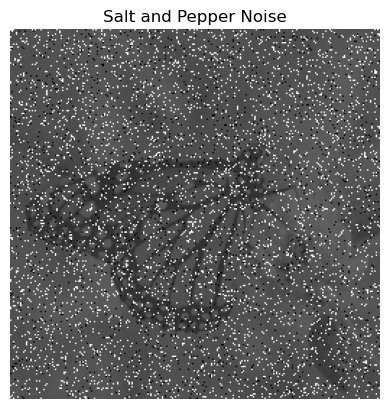

In [7]:
import random
import cv2
import matplotlib.pyplot as plt

def add_noise(img):
    # Getting the dimensions of the image
    row, col = img.shape

    # Adding salt noise (white pixels)
    number_of_pixels = random.randint(300, 10000)
    for i in range(number_of_pixels):
        y_coord = random.randint(0, row - 1)
        x_coord = random.randint(0, col - 1)
        img[y_coord][x_coord] = 255  # Set to white

    # Adding pepper noise (black pixels)
    number_of_pixels = random.randint(300, 10000)
    for i in range(number_of_pixels):
        y_coord = random.randint(0, row - 1)
        x_coord = random.randint(0, col - 1)
        img[y_coord][x_coord] = 0  # Set to black

    return img

# Read the grayscale image
img = cv2.imread('C:/Users/DS20/Desktop/image.png', cv2.IMREAD_GRAYSCALE)  # Replace with your image path

# Add salt-and-pepper noise
noisy_img = add_noise(img)

# Save the noisy image
cv2.imwrite('salt-and-pepper-lena.jpg', noisy_img)

# Display the noisy image using Matplotlib
plt.imshow(noisy_img, cmap='gray')
plt.title('Salt and Pepper Noise')
plt.axis('off')  # Hide axis
plt.show()
